# Imports, function definitions and assumptions

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import latex
from scipy.interpolate import make_interp_spline, BSpline
import csv

sp.init_printing(use_latex=True)

# Drive to Manual effort
## Points of interest

In [2]:
# These points of interest should describe the nominal curve.

# positions in degrees
drive_position = 0
manual_position = 8.25
detent_peak = 5

# efforts in Newtons
friction = 7
max_effort = 13
min_effort = -7

theta =  [0, 2, 5, 6.5, 8.25]
effort = [0,max_effort, 0,  min_effort, 0]


## Smoothing

In [3]:
xnew = np.linspace(drive_position,manual_position,300) # create 300 data points between drive and manual positions
spline = make_interp_spline(theta, effort, k=3) # best fit spline to data entered in the previous section
effort_smooth = spline(xnew) # interpolate effort points given 300 position points and the best fit spline

# Create two effort curves offset by friction from the nominal curve
D_M_effort = []
M_D_effort = []
for e in effort_smooth:
    D_M_effort.append(e+friction/2)
    M_D_effort.append(e-friction/2)
    
D_M_min = min(D_M_effort)
M_D_min = min(M_D_effort)
nominal_min = min(effort_smooth)

## Plot data

Text(4.5, -7.359977408668573, '( $2*F$ )')

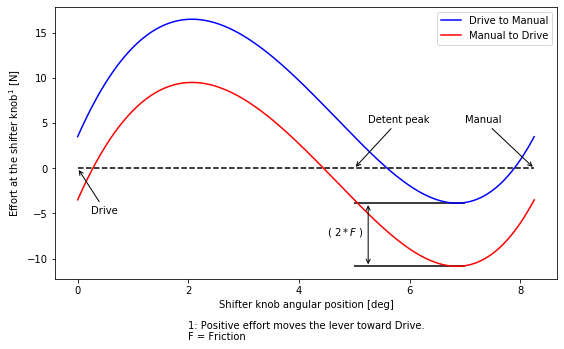

In [4]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
ax.set_ylabel("Effort at the shifter knob$^1$ [N]")
ax.set_xlabel("Shifter knob angular position [deg]")

# Plot caption including footnote
text = "1: Positive effort moves the lever toward Drive.\nF = Friction"
ax.text(2,-19,text, ha='left')

ax.plot(xnew,D_M_effort,'b',xnew,M_D_effort,'r')

# The legend will be populated by elements that precede this function call and not those that come after it.
ax.legend(("Drive to Manual","Manual to Drive"))

# Plot a horizontal line at 0 N for clarity
ax.hlines(0,drive_position,manual_position,'black','dashed')

# Add arrows to annotate various points of interest on the graph
ax.annotate(s='Drive',
            xy=(drive_position,0),
            xytext=(drive_position+0.25,-5),
            arrowprops=dict(arrowstyle='->'))

ax.annotate(s='Manual',
            xy=(manual_position,0),
            xytext=(manual_position-1.25,+5),
            arrowprops=dict(arrowstyle='->'))

ax.annotate(s='Detent peak',
            xy=(detent_peak,0),
            xytext=(detent_peak+0.25,+5),
            arrowprops=dict(arrowstyle='->'))

# Add dimensional callouts
ax.hlines(D_M_min, detent_peak, 7)
ax.hlines(M_D_min,detent_peak, 7)
ax.annotate(s='',
            xy=(detent_peak+0.25,D_M_min),
            xytext=(detent_peak+0.25,M_D_min),
            arrowprops=dict(arrowstyle='<->'))
ax.annotate(s='( $2*F$ )',
            xy=(detent_peak-0.5, nominal_min))

# Manual gate force

## Points of interest

In [42]:
with open(r"C:\Users\clappg\Desktop\data.csv",'r') as data:

    travel = []
    effort = []
    ret_effort = []
    data_reader = csv.reader(data)
    for d in data_reader:
        travel.append(float(d[0]))
        effort.append(float(d[1]))
        ret_effort.append(float(d[2]))
    
print(travel)
print(effort)
print(ret_effort)

[-5.0, -4.9, -4.65, -4.4, -4.0, -3.0, -2.0, -1.5, -1.0, 0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 4.4, 4.65, 4.9, 5.0]
[-40.0, -23.0, -22.0, -22.0, -23.0, -28.0, -30.0, -30.0, -28.0, 0.0, 28.0, 30.0, 30.0, 28.0, 23.0, 22.0, 22.0, 23.0, 40.0]
[-40.0, -8.0, -7.0, -7.0, -8.0, -13.0, -15.0, -15.0, -13.0, 0.0, 13.0, 15.0, 15.0, 13.0, 8.0, 7.0, 7.0, 8.0, 40.0]


## Smoothing

In [43]:
xnew2 = np.linspace(-5,5,300)
spline2 = make_interp_spline(travel, effort, k=3)
spline3 = make_interp_spline(travel, ret_effort, k=3)

effort_smooth = spline2(xnew2)
ret_effort_smooth = spline3(xnew2)


## Plot data

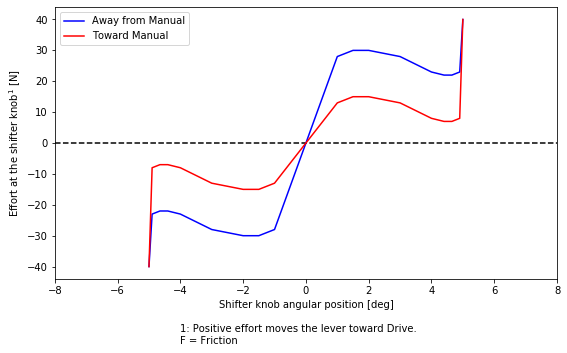

In [49]:
fig2, ax2 = plt.subplots(1,1,figsize=(9,5))
ax2.set_ylabel("Effort at the shifter knob$^1$ [N]")
ax2.set_xlabel("Shifter knob angular position [deg]")
ax2.set_xlim(-8,8)

# Plot caption including footnote
text2 = "1: Positive effort moves the lever toward Drive.\nF = Friction"
ax2.text(-4,-65,text2, ha='left')

ax2.plot(travel,effort,'b',travel,ret_effort,'r')
#ax2.plot(xnew2,effort_smooth,'b',xnew2,ret_effort_smooth,'r')

# The legend will be populated by elements that precede this function call and not those that come after it.
ax2.legend(("Away from Manual","Toward Manual"))

# Plot a horizontal line at 0 N for clarity
ax2.hlines(0,-8,8,'black','dashed')
